In [34]:
import numpy as np
import pandas as pd
import math

In [35]:
Meterial_spectrum=pd.read_csv('Meterial_spectrum.csv')

In [36]:
Nameid=Meterial_spectrum['Name'].to_dict()

In [37]:
res = dict((v,k) for k,v in Nameid.items())
Nameid=0
Nameid=res
Nameid

{'Bone (Cancellous)': 0,
 'Bone (Cortical)': 1,
 'Bone Marrow (Red)': 2,
 'Bone Marrow (Yellow)': 3,
 'Brain': 4,
 'Brain (Grey Matter)': 5,
 'Brain (White Matter)': 6,
 'Eye (Aqueous Humor)': 7,
 'Eye (Choroid)': 8,
 'Eye (Ciliary Body)': 9,
 'Eye (Cornea)': 10,
 'Eye (Iris)': 11,
 'Eye (Lens)': 12,
 'Eye (Retina)': 13,
 'Eye (Sclera)': 14,
 'Eye (Vitreous Humor)': 15,
 'Eye Lens (Cortex)': 16,
 'Eye Lens (Nucleus)': 17,
 'Muscles': 18,
 'Skin': 19,
 'Skull Cancellous': 20,
 'Skull Cortical': 21,
 'Tooth': 22,
 'Air': 23,
 'Sinus': 24,
 'CSF': 25,
 'Blood Vessel Wall': 26,
 'Tongue': 27,
 'Connective Tissue': 28,
 'Pharynx': 29,
 'Larynx': 30,
 'Trachea': 31,
 'Body of mandible': 32,
 'Spinal cord': 33,
 'Mylohyoid': 34,
 'Lingual septum': 35,
 'Mandible': 36,
 'Hyoglossus': 37,
 'Cricoarytenoid': 38,
 'Oblique Arytenoid': 39,
 'Spinal cord2': 40,
 'Hyoid bone': 41,
 'Carotid shealth': 42,
 'incisire duct': 43,
 'lip': 44,
 'gingira': 45,
 'Marilla': 46,
 'Parotid  Space': 47,
 'Cavit

In [38]:
Meterial_id=pd.read_csv('Meterial_id.csv')
Meterial_id['id']='NaN'
for i in range(len(Meterial_id)):
    Meterial_id.ix[i, 'id']=Nameid[Meterial_id.iloc[i].Name]

/Users/mattjunk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [39]:
Meterial_id=Meterial_id.set_index('id')
Meterial_id

,Name,R,G,B
id,,,,
0,Bone (Cancellous),255,241,210
1,Bone (Cortical),255,204,181
2,Bone Marrow (Red),288,110,255
3,Bone Marrow (Yellow),216,216,216
4,Brain,255,255,119
5,Brain (Grey Matter),-1,-1,-1
6,Brain (White Matter),178,123,119
7,Eye (Aqueous Humor),-1,-1,-1
8,Eye (Choroid),-1,-1,-1


In [40]:
(Meterial_id['R']==97) & (Meterial_id['G']==58) & (Meterial_id['B']==104)

id
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44     True
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [41]:
#Meterial_id[(Meterial_id['R']==0) & (Meterial_id['G']==0) & (Meterial_id['B']==0)].index[0]

In [53]:
dictforid={}
def getid(r=0,g=0,b=0):
    if(r==0 and g==0 and b==0):
        return -1
    if (len(Meterial_id[(Meterial_id['R']==r) & (Meterial_id['G']==g) & (Meterial_id['B']==b)])==0):
        #print("No record",r,g,b)
        
        dictforid={}
        for i in range(len(Meterial_id)):
            if(Meterial_id.iloc[i].R==-1 and Meterial_id.iloc[i].G==-1 and Meterial_id.iloc[i].B==-1 ):
                pass
            else:
                dictforid[i]=abs(Meterial_id.iloc[i].R-r)+abs(Meterial_id.iloc[i].G-g)+abs(Meterial_id.iloc[i].B-b)
        dictforid[-1]=abs(r)+abs(g)+abs(b)
        return min(dictforid, key=dictforid.get)
        return -2
    else:
        return Meterial_id[(Meterial_id['R']==r) & (Meterial_id['G']==g) & (Meterial_id['B']==b)].index[0]

In [54]:
getid(26,150,120)

33

In [55]:
from skimage import io
photo=[]
for i in range(1,31):
    img = io.imread("Sample/CT"+str(i)+".png")
    photo.append(img)

In [56]:
np.unique(photo[0][:,:,3])

Array([  0, 255], dtype=uint8)

In [57]:
queue=pd.DataFrame(columns=['x','y','z','distancepow2','distance','material'])
#queue=queue.append({'x':0,'y':0,'z':0,'distancepow2':0,'distance':0}, ignore_index=True)
queue

,x,y,z,distancepow2,distance,material


In [51]:
#z y x
model = np.zeros(shape=(len(photo),photo[0].shape[0],photo[0].shape[1]))
for iz in range(len(photo)):
    print(iz)
    for iy in range(photo[0].shape[0]):
        if (iy%30==0):
            print('y',iy,end=',')
        for ix in range(photo[0].shape[1]):
            #print(ix,iy,iz)
            if(photo[iz][iy][ix][3]>0):
                queue=queue.append({'x':ix,'y':iy,'z':iz,'distancepow2':0,'distance':0,"material":getid(photo[iz][iy][ix][0],photo[iz][iy][ix][1],photo[iz][iy][ix][2])}, ignore_index=True)

0
y 0,y 10,y 20,y 30,y 40,y 50,y 60,y 70,y 80,y 90,y 100,y 110,y 120,y 130,y 140,y 150,y 160,y 170,y 180,y 190,y 200,y 210,y 220,y 230,y 240,y 250,y 260,y 270,y 280,y 290,y 300,y 310,y 320,y 330,y 340,y 350,y 360,y 370,y 380,y 390,y 400,y 410,y 420,y 430,y 440,y 450,y 460,y 470,y 480,y 490,y 500,y 510,y 520,y 530,y 540,y 550,y 560,y 570,y 580,y 590,y 600,y 610,y 620,y 630,y 640,y 650,y 660,y 670,y 680,y 690,y 700,y 710,

KeyboardInterrupt: 

In [52]:
print(np.count_nonzero(queue.material==-2))
print(np.count_nonzero(queue.material==-1))
print(np.count_nonzero(queue.material>=0))
queue.to_csv("queue_wo_dis.csv")

0
0
19955


In [17]:
queue=pd.read_csv('queue_wo_dis.csv')
queue=queue.drop(['Unnamed: 0'], axis=1)
queue.head()

,x,y,z,distancepow2,distance,material
0,0,0,0,0,0,-1
1,1,0,0,0,0,-1
2,2,0,0,0,0,-1
3,3,0,0,0,0,-1
4,4,0,0,0,0,-1


In [18]:
len(queue)

100000

In [19]:
sounddropx=50
sounddropy=40
sounddropz=0
lengthx=17/100
lengthy=17/100
lengthz=20/10
queue['distancepow2']=((queue['x']-sounddropx)*lengthx)**2+((queue['y']-sounddropy)*lengthy)**2+((queue['z']-sounddropz)*lengthz)**2
queue['distance']=np.sqrt(list(queue['distancepow2']))

In [20]:
3*17/7*100

728.5714285714286

In [21]:
queue = queue.sort_values('distancepow2')
queue=queue.reset_index()

In [22]:
queue.head(20)

,index,x,y,z,distancepow2,distance,material
0,4050,50,40,0,0.0000,0.000000,23
1,4049,49,40,0,0.0289,0.170000,23
2,4150,50,41,0,0.0289,0.170000,28
3,4051,51,40,0,0.0289,0.170000,23
4,3950,50,39,0,0.0289,0.170000,23
5,3951,51,39,0,0.0578,0.240416,23
6,3949,49,39,0,0.0578,0.240416,23
7,4149,49,41,0,0.0578,0.240416,28
8,4151,51,41,0,0.0578,0.240416,28
9,4250,50,42,0,0.1156,0.340000,28


In [100]:
# 27.5 55 110 220 440 880 1760 3520 7040 14080
Absobtion=Meterial_spectrum['14080']

In [101]:
# 27.5 55 110 220 440 880 1760 3520 7040 14080
Meterial_spectrum['14080'][0]

0.282111665

In [60]:
int(queue.iloc[1856].material)

1

In [102]:
model = np.zeros(shape=(len(photo),photo[0].shape[0],photo[0].shape[1]))
model.sum()

0.0

In [103]:
model = np.zeros(shape=(len(photo),photo[0].shape[0],photo[0].shape[1]))
model[sounddropz,sounddropy,sounddropx]=1000000

co1=lengthx
co2=np.sqrt(2)*lengthx
co1z=lengthz
co2z=np.sqrt((lengthx**2)+(lengthz**2))
co3z=np.sqrt((2*(lengthx**2))+(lengthz**2))
allmultiple=co1*co2*co1z*co2z*co3z
co1=allmultiple/co1
co2=allmultiple/co2
co1z=allmultiple/co1z
co2z=allmultiple/co2z
co3z=allmultiple/co3z

evgle=((lengthx*lengthy*lengthz*6/math.pi)**(1/3))/100
for i in range(1,len(queue)):
    if(i%2000==0):
        print(i)
    ix=int(queue.iloc[i].x)
    iy=int(queue.iloc[i].y)
    iz=int(queue.iloc[i].z)
    imaterial=int(queue.iloc[i].material)
    if(imaterial>=0):
        
        Abs=Absobtion[imaterial]#abs per lengthx

        val=0
        piece=0

        if(ix-1>=0):
            if(model[iz][iy][ix-1]>0):
                piece=piece+co1
                val=val+((model[iz][iy][ix-1])*co1)

        if(ix+1<model.shape[2]):
            if(model[iz][iy][ix+1]>0):
                piece=piece+co1
                val=val+((model[iz][iy][ix+1])*co1)

        if(iy-1>=0):
            if(model[iz][iy-1][ix]>0):
                piece=piece+co1
                val=val+((model[iz][iy-1][ix])*co1)

        if(iy+1<model.shape[1]):
            if(model[iz][iy+1][ix]>0):
                piece=piece+co1
                val=val+((model[iz][iy+1][ix])*co1)

        if(iz-1>=0):
            if(model[iz-1][iy][ix]>0):
                piece=piece+co1z
                val=val+((model[iz-1][iy][ix])*co1z)

        if(iz+1<model.shape[0]):
            if(model[iz+1][iy][ix]>0):
                piece=piece+co1z
                val=val+((model[iz+1][iy][ix])*co1z)

        ####################################

        if(ix-1>=0 and iy-1>=0):
            if(model[iz][iy-1][ix-1]>0):
                piece=piece+co2
                val=val+((model[iz][iy-1][ix-1])*co2)

        if(ix+1<model.shape[2] and iy-1>=0):
            if (model[iz][iy-1][ix+1]>0):
                piece=piece+co2
                val=val+((model[iz][iy-1][ix+1])*co2)

        if(ix-1>=0 and iy+1<model.shape[1]):
            if(model[iz][iy+1][ix-1]>0):
                piece=piece+co2
                val=val+((model[iz][iy+1][ix-1])*co2)

        if(ix+1<model.shape[2] and iy+1<model.shape[1]):
            if(model[iz][iy+1][ix+1]>0):
                piece=piece+co2
                val=val+((model[iz][iy+1][ix+1])*co2)

        ####

        if(ix-1>=0 and iz-1>=0):
            if(model[iz-1][iy][ix-1]>0):
                piece=piece+co2z
                val=val+((model[iz-1][iy][ix-1])*co2z)

        if(ix-1>=0 and iz+1<model.shape[0]):
            if(model[iz+1][iy][ix-1]>0):
                piece=piece+co2z
                val=val+((model[iz+1][iy][ix-1])*co2z)

        if(ix+1<model.shape[2] and iz-1>=0):
            if(model[iz-1][iy][ix+1]>0):
                piece=piece+co2z
                val=val+((model[iz-1][iy][ix+1])*co2z)

        if(ix+1<model.shape[2] and iz+1<model.shape[0]):
            if(model[iz+1][iy][ix+1]>0):
                piece=piece+co2z
                val=val+((model[iz+1][iy][ix+1])*co2z)

        ####

        if(iy-1>=0 and iz-1>=0):
            if(model[iz-1][iy-1][ix]>0):
                piece=piece+co2z
                val=val+((model[iz-1][iy-1][ix])*co2z)

        if(iy-1>=0 and iz+1<model.shape[0]):
            if(model[iz+1][iy-1][ix]>0):
                piece=piece+co2z
                val=val+((model[iz+1][iy-1][ix])*co2z)

        if(iy+1<model.shape[1] and iz-1>=0):
            if(model[iz-1][iy+1][ix]>0):
                piece=piece+co2z
                val=val+((model[iz-1][iy+1][ix])*co2z)

        if(iy+1<model.shape[1] and iz+1<model.shape[0]):
            if(model[iz+1][iy+1][ix]>0):
                piece=piece+co2z
                val=val+((model[iz+1][iy+1][ix])*co2z)

        ####################################

        if(ix-1>=0 and iy-1>=0 and iz-1>=0):
            if(model[iz-1][iy-1][ix-1]>0):
                piece=piece+co3z
                val=val+((model[iz-1][iy-1][ix-1])*co3z)

        if(ix+1<model.shape[2] and iy+1<model.shape[1] and iz+1<model.shape[0]):
            if(model[iz+1][iy+1][ix+1]>0):
                piece=piece+co3z
                val=val+((model[iz+1][iy+1][ix+1])*co3z)

        if(ix-1>=0 and iy-1>=0 and iz+1<model.shape[0]):
            if(model[iz+1][iy-1][ix-1]>0):
                piece=piece+co3z
                val=val+((model[iz+1][iy-1][ix-1])*co3z)

        if(ix-1>=0 and iy+1<model.shape[1] and iz-1>=0):
            if(model[iz-1][iy+1][ix-1]>0):
                piece=piece+co3z
                val=val+((model[iz-1][iy+1][ix-1])*co3z)

        if(ix-1>=0 and iy+1<model.shape[1] and iz+1<model.shape[0]):
            if(model[iz+1][iy+1][ix-1]>0):
                piece=piece+co3z
                val=val+((model[iz+1][iy+1][ix-1])*co3z)

        ## 

        if(ix+1<model.shape[2] and iy-1>=0 and iz-1>=0):
            if(model[iz-1][iy-1][ix+1]>0):
                piece=piece+co3z
                val=val+((model[iz-1][iy-1][ix+1])*co3z)

        if(ix+1<model.shape[2] and iy-1>=0 and iz+1<model.shape[0]):
            if(model[iz+1][iy-1][ix+1]>0):
                piece=piece+co3z
                val=val+((model[iz+1][iy-1][ix+1])*co3z)

        if(ix+1<model.shape[2] and iy+1<model.shape[1] and iz-1>=0):
            if(model[iz-1][iy+1][ix+1]>0):
                piece=piece+co3z
                val=val+((model[iz-1][iy+1][ix+1])*co3z)

        model[iz,iy,ix]=(val/piece)/(10**(Abs*8.69*evgle))

2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
30000
32000
34000
36000
38000
40000
42000
44000
46000
48000
50000
52000
54000
56000
58000
60000
62000
64000
66000
68000
70000
72000
74000
76000
78000
80000
82000
84000
86000
88000
90000
92000
94000
96000
98000


In [ ]:
#q9=queue[queue['z']==3]

In [ ]:
'''
empty9 = np.zeros(shape=(100,100))
for i in range(len(q9)):
    cell=q9.iloc[i]
    empty9[cell.y][cell.x]=cell.distance
'''

In [108]:
from numpy import asarray
from numpy import save
#save('14080hz.npy', model)
'''
from numpy import load
# load array
'''
from numpy import load
model = load('110hz.npy')

In [109]:
model[model!=0].min()

977887.9187350414

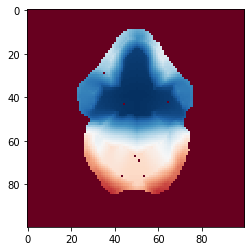

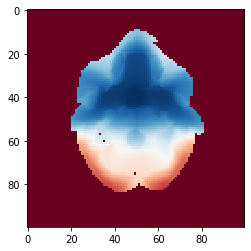

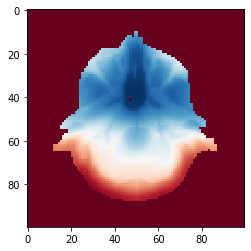

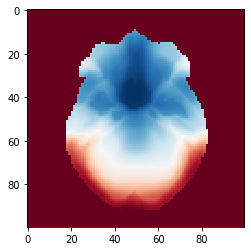

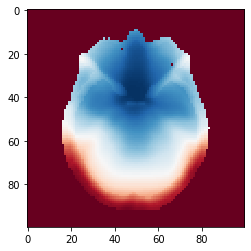

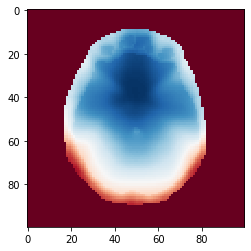

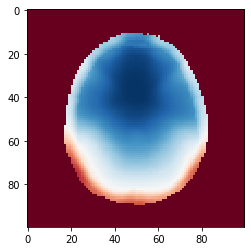

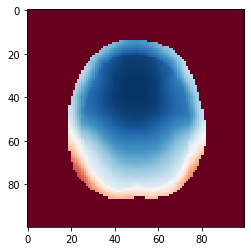

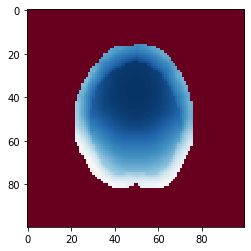

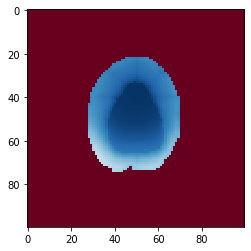

In [110]:

import matplotlib.pyplot as plt

for i in range(10):
        #cell=q9.iloc[i]
        #empty9[cell.y][cell.x]=cell.distance
    plt.imshow(model[i], cmap="RdBu",interpolation='nearest',
               vmin=977887, vmax=1000000)
    plt.savefig("110hz_"+str(i)+'.png')
    plt.show()
